<a href="https://colab.research.google.com/github/sreesanthrnair/DSA_Notes/blob/main/Logistic_Regression%2C_Naive_Bayes%2C_KNN%2C_hyperparameters_26_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***

## Machine Learning Classification Notes

### 1. Classification Algorithms

| Algorithm | Concept | Simple Example/Use Case | Key Hyperparameter |
| :--- | :--- | :--- | :--- |
| **Logistic Regression** | Uses the **Sigmoid function** to output a **probability** between 0 and 1. It finds a linear boundary for separation. | Predicting if an email is **Spam (1)** or **Not Spam (0)**. | **C** (Regularization strength) |
| **Naive Bayes** | Based on **Bayes' Theorem** with a "naive" assumption that all features are **independent**. | Text classification, like predicting a document's **category** (Sports, News, etc.). | **Alpha** (Smoothing parameter to handle zero probabilities) |
| **K-Nearest Neighbors (KNN)** | A "lazy" algorithm that classifies a new point based on the **majority class** of its **$K$ closest neighbors**. | Recommending a movie based on the genre preferences of the **3 or 5 most similar users**. | **$K$** (The number of neighbors to check) |

---

### 2. Hyperparameters

**Hyperparameters** are external settings that you, the user, set **before** the model training begins. They control the structure and how the model learns.

**Example:** Setting the value of **$K$** in KNN to $5$. If you change it to $10$, the model's behavior changes entirely.

---

### 3. Evaluation Metrics (Formulas)

These metrics help you understand your model's performance, especially in binary classification.

| Term | Definition |
| :--- | :--- |
| **TP** (True Positive) | Correctly predicted the positive class. |
| **TN** (True Negative) | Correctly predicted the negative class. |
| **FP** (False Positive) | Incorrectly predicted positive (but it was actually negative). |
| **FN** (False Negative) | Incorrectly predicted negative (but it was actually positive). |

| Metric | Formula | What it tells you | When to use it |
| :--- | :--- | :--- | :--- |
| **Accuracy** | $$\frac{TP + TN}{\text{Total Predictions}}$$ | Overall correctness of the model. | When your dataset is **balanced** (classes have similar counts). |
| **Precision** | $$\frac{TP}{TP + FP}$$ | When the model predicts positive, how often is it right? | When minimizing **False Positives** is critical (e.g., classifying a good email as spam). |
| **Recall** | $$\frac{TP}{TP + FN}$$ | Of all the actual positives, how many did the model find? | When minimizing **False Negatives** is critical (e.g., failing to detect a disease). |
| **F1 Score** | $$2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ | A single score that balances Precision and Recall. | When your dataset is **imbalanced**, and you need a good balance between FP and FN. |

**Example of F1 Score:** In a rare disease detection system, you want **high Recall** (don't miss any actual cases) and **high Precision** (don't scare healthy people). The F1 Score gives you the best single indicator of this balance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

social_network=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
social_network

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
social_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
social_network.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
social_network.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
social_network.duplicated().sum()

np.int64(0)

In [ ]:
social_network.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
social_network['Purchased'].value_counts(normalize=True)

,proportion
Purchased,
0,0.6425
1,0.3575


In [ ]:
social_network=pd.get_dummies(social_network,dtype='int64')

In [ ]:
social_network.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
social_network.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


In [ ]:
x=social_network.drop(['User ID','Purchased'],axis=1)
y=social_network['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train.shape

(320, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is ',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 Score is ',f1_score(y_test,y_pred))

Accuracy is  0.8875
Precision is 0.9130434782608695
Recall is 0.75
f1 Score is  0.8235294117647058


In [ ]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]])

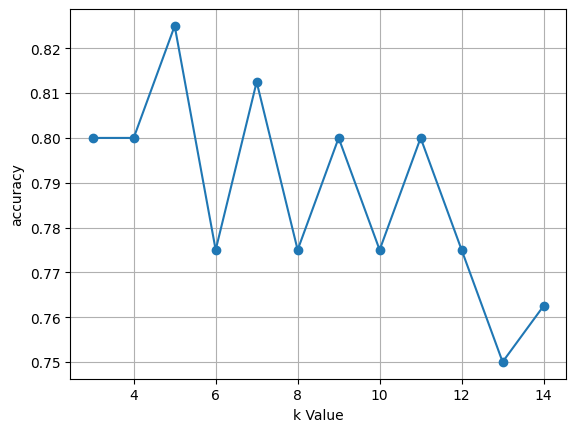

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred_knn))
print('Precision is',precision_score(y_test,y_pred_knn))
print('Recall is',recall_score(y_test,y_pred_knn))
print('f1 score is',f1_score(y_test,y_pred_knn))
confusion_matrix(y_test,y_pred_knn)

Accuracy is 0.825
Precision is 0.7692307692307693
Recall is 0.7142857142857143
f1 score is 0.7407407407407407


array([[46,  6],
       [ 8, 20]])

In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris.duplicated().sum()

np.int64(1)